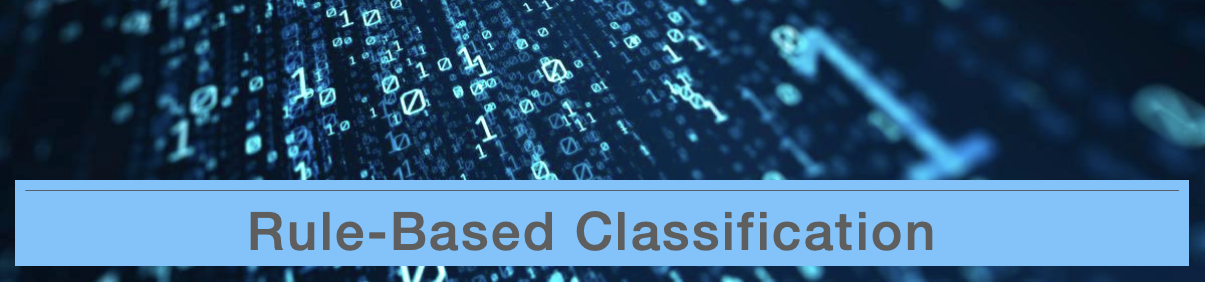
**Business Problem:**
A gaming company wants to create new customer profiles (personas) based on certain characteristics of its customers and form segments according to these new customer profiles. The company aims to predict how much revenue new customers in these segments could potentially bring to the company on average.

**For example:** 
The company wants to determine the average revenue that a 33 year old female user from Turkey who uses Android can generate.

**Dataset Details:**
The persona.csv dataset contains information on the prices of products sold by an international gaming company and some demographic details of the users who purchased these products. The dataset consists of records generated from each sales transaction. This means that the table is not deduplicated. In other words, a user with certain demographic characteristics might have made multiple purchases.

**The variables in the dataset are:**

* **Price:** Customer spending amount
* **Source:** Type of device the customer is connected from
* **Sex:** Gender of the customer
* **Country:** Country of the customer
* **Age:** Age of the customer

**Step 1**
* Import necessary libraries and read the dataset.

In [1]:
import pandas as pd
persona = pd.read_csv('/kaggle/input/persona/persona.csv')
df = persona.copy() # Creating a copy of the dataset for ease of use.

**Step 2**
* Writing a function for a quick overview of the dataset.

In [2]:
def check_detail(dataframe):
    d = {'HEAD': dataframe.head(),
        'TAIL': dataframe.tail(),
        'SHAPE': dataframe.shape,
        'COLUMNS': dataframe.columns,
        'INDEX': dataframe.index,
        'ISNULL.VALUES.ANY': dataframe.isnull().values.any(),
        'ISNULL.SUM': dataframe.isnull().sum(),
        'DESCRIBE.T': dataframe.describe().T}
    hashtags = '#################'
    for key, val in d.items():
        print(f'{hashtags} {key} {hashtags}')
        print(val)
    print(f'{hashtags} {"LIST END"} {hashtags}')

check_detail(dataframe=df)

################# HEAD #################
   PRICE   SOURCE   SEX COUNTRY  AGE
0     39  android  male     bra   17
1     39  android  male     bra   17
2     49  android  male     bra   17
3     29  android  male     tur   17
4     49  android  male     tur   17
################# TAIL #################
      PRICE   SOURCE     SEX COUNTRY  AGE
4995     29  android  female     bra   31
4996     29  android  female     bra   31
4997     29  android  female     bra   31
4998     39  android  female     bra   31
4999     29  android  female     bra   31
################# SHAPE #################
(5000, 5)
################# COLUMNS #################
Index(['PRICE', 'SOURCE', 'SEX', 'COUNTRY', 'AGE'], dtype='object')
################# INDEX #################
Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       4990, 4991, 4992, 4993, 4994, 4995, 4996, 4997, 4998, 4999],
      dtype='int64', length=5000)
################# ISNULL.VALUES.ANY #################
Fals

**Step 3**
* Let's check the variable types.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


**Step 4**
* Take a look at our dataset.
    * The total revenue generated from Price by Country.
    * The average Price by Country, Source.
    * The average Price by Country, Source, Sex and Age. (first 10 rows)

In [4]:
df.pivot_table(values='PRICE',index='COUNTRY',aggfunc='sum') # 1

,PRICE
COUNTRY,
bra,51354
can,7730
deu,15485
fra,10177
tur,15689
usa,70225


In [5]:
df.groupby(by=["COUNTRY", 'SOURCE']).agg({"PRICE": "mean"}) # 2 

PRICE
COUNTRY SOURCE            
bra     android  34.387029
        ios      34.222222
can     android  33.330709
        ios      33.951456
deu     android  33.869888
        ios      34.268817
fra     android  34.312500
        ios      32.776224
tur     android  36.229437
        ios      33.272727
usa     android  33.760357
        ios      34.371703

In [6]:
df.groupby(by=['COUNTRY', 'SOURCE', 'SEX', 'AGE']).agg({'PRICE': 'mean'}).head(10)  # 3

PRICE
COUNTRY SOURCE  SEX    AGE           
bra     android female 15   38.714286
                       16   35.944444
                       17   35.666667
                       18   32.255814
                       19   35.206897
                       20   31.000000
                       21   37.292683
                       22   34.945946
                       23   31.941176
                       24   36.500000

**Step 5:**
* The average Price by Country, Source, Sex and Age sorting in descending order by Price and assigning it to a new dataframe. (sort_df)

In [7]:
sort_df = df.groupby(by=['COUNTRY', 'SOURCE', 'SEX', 'AGE']).agg({'PRICE': 'mean'}).sort_values('PRICE', ascending=False)
sort_df.head() # first 5

,,,,PRICE
COUNTRY,SOURCE,SEX,AGE,
bra,android,male,46,59.0
usa,android,male,36,59.0
fra,android,female,24,59.0
usa,ios,male,32,54.0
deu,android,female,36,49.0


**Step 6:**
* Convert the names in the index to variable names.

In [8]:
sort_df = sort_df.reset_index()
sort_df.columns

Index(['COUNTRY', 'SOURCE', 'SEX', 'AGE', 'PRICE'], dtype='object')

**Step 7:**
* Convert the Age variable into a categorical variable and add it to sort_df.
    * Specify the bins for the Age variable.
    * Specify the labels corresponding to the bins.
    * Let's create a new variable named 'AGE_CAT' and add it to sort_df.

In [9]:
new_bins= [0, 18, 23, 30, 40, sort_df['AGE'].max()]
new_labels = ['0_18', '19_23', '24_30', '31_40', '41_' + str(sort_df['AGE'].max())]
sort_df['AGE_CAT'] = pd.cut(sort_df['AGE'], bins=new_bins, labels=new_labels)
sort_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT
0,bra,android,male,46,59.0,41_66
1,usa,android,male,36,59.0,31_40
2,fra,android,female,24,59.0,24_30
3,usa,ios,male,32,54.0,31_40
4,deu,android,female,36,49.0,31_40


**Step 8:**
* Define new level-based customers and add them as a variable to the sort_df.


In [10]:
sort_df['customers_level_based'] = sort_df[['COUNTRY', 'SOURCE', 'SEX', 'AGE_CAT']].agg(lambda x: '_'.join(x).upper(), axis=1)
sort_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT,customers_level_based
0,bra,android,male,46,59.0,41_66,BRA_ANDROID_MALE_41_66
1,usa,android,male,36,59.0,31_40,USA_ANDROID_MALE_31_40
2,fra,android,female,24,59.0,24_30,FRA_ANDROID_FEMALE_24_30
3,usa,ios,male,32,54.0,31_40,USA_IOS_MALE_31_40
4,deu,android,female,36,49.0,31_40,DEU_ANDROID_FEMALE_31_40


**Step 9:**
* There may be many identical segments, so we need to make them unique. 

**For example:** 
There may be many instances of the segment BRA_IOS_MALE_31_40.

In [11]:
sort_df['customers_level_based'].value_counts().head(10)

customers_level_based
BRA_ANDROID_MALE_24_30      7
USA_ANDROID_MALE_41_66      7
USA_IOS_FEMALE_24_30        7
BRA_ANDROID_FEMALE_24_30    7
USA_ANDROID_MALE_24_30      7
BRA_IOS_MALE_31_40          6
USA_ANDROID_FEMALE_24_30    6
USA_IOS_MALE_24_30          6
BRA_IOS_FEMALE_24_30        6
USA_ANDROID_MALE_31_40      6
Name: count, dtype: int64

In [12]:
sort_df = sort_df.groupby("customers_level_based").agg({"PRICE": "mean"})
sort_df.columns

Index(['PRICE'], dtype='object')

In [13]:
sort_df = sort_df.reset_index() # Let's convert "customers_level_based" into a variable.
sort_df.columns

Index(['customers_level_based', 'PRICE'], dtype='object')

In [14]:
sort_df["customers_level_based"].value_counts().head(10)

customers_level_based
BRA_ANDROID_FEMALE_0_18     1
TUR_ANDROID_FEMALE_0_18     1
TUR_IOS_FEMALE_19_23        1
TUR_IOS_FEMALE_0_18         1
TUR_ANDROID_MALE_41_66      1
TUR_ANDROID_MALE_31_40      1
TUR_ANDROID_MALE_24_30      1
TUR_ANDROID_MALE_19_23      1
TUR_ANDROID_MALE_0_18       1
TUR_ANDROID_FEMALE_41_66    1
Name: count, dtype: int64

In [15]:
sort_df.head()

,customers_level_based,PRICE
0,BRA_ANDROID_FEMALE_0_18,35.645303
1,BRA_ANDROID_FEMALE_19_23,34.077340
2,BRA_ANDROID_FEMALE_24_30,33.863946
3,BRA_ANDROID_FEMALE_31_40,34.898326
4,BRA_ANDROID_FEMALE_41_66,36.737179


**Step 10**

* Let's divide the segments by PRICE and add them to sort_df with the name 'SEGMENT'.

In [16]:
sort_df['SEGMENT'] = pd.qcut(sort_df['PRICE'], 4, labels=['D', 'C', 'B', 'A'])
sort_df.groupby("SEGMENT",observed=True ).agg({'PRICE':'mean'})

,PRICE
SEGMENT,
D,29.206780
C,33.509674
B,34.999645
A,38.691234


**Step 11**
* Let's write a function to classify new incoming customers and predict the average revenue they might bring.

In [17]:
def filtre_seg(dataframe,new_user):
    
    for user in dataframe:
        filtered_user = dataframe[dataframe["customers_level_based"] == new_user]
    return filtered_user    

**Example**
* Let's call the customers in the segment we want with the function named filtre_seg().

In [18]:
filtre_seg(sort_df, new_user='TUR_ANDROID_FEMALE_31_40') 

,customers_level_based,PRICE,SEGMENT
72,TUR_ANDROID_FEMALE_31_40,41.833333,A
